# Edge Detection & Gradients

In [1]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:

    # Take each frame
    _, frame = cap.read()
    
    laplacian = cv2.Laplacian(frame, cv2.CV_64F)
    
    #et,thresh = cv2.threshold(laplacian,0,255.0,cv2.THRESH_TOZERO)
    #laplacian8 = np.uint8(laplacian)
    #cv2.imshow('sud',laplacian8) -> outside document for sudoku stuffs
    
    # X,Y Gradients: Directional Intensity
    sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)
    
    # Canny Edge Detectors
    edges = cv2.Canny(frame, 100, 200)
    
    cv2.imshow("orginal", frame)
    cv2.imshow("laplacian", laplacian)
       
    cv2.imshow('sobelx',sobelx)
    cv2.imshow('sobely',sobely)
    
    cv2.imshow('edges',edges)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

# Template Matching 

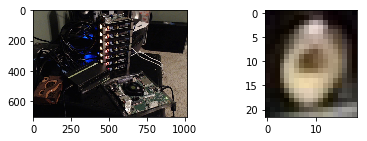

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

i1 = Image.open("matchpic.jpg")
iar1 = np.array(i1)

i2 = Image.open("template.jpg")
iar2 = np.array(i2)

ax1 = plt.subplot2grid((8,6), (0,0), rowspan=4, colspan=3) 
#                      shape  location
# number of rows spanning to the right, columns -> downwards

ax2 = plt.subplot2grid((8,6), (0,4), rowspan=4, colspan=3)

ax1.imshow(iar1)
ax2.imshow(iar2)
plt.show()

In [3]:
# 80% match (almost identical) solution:
import cv2
import numpy as np

img_bgr = cv2.imread('matchpic.jpg')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

template = cv2.imread("template.jpg", 0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = .7 # -> .7 to get more, but not accurate
# ideas: have multiple copies of template to perform matching

loc = np.where(res >= threshold)

# mark all on the picture:
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_bgr, pt, (pt[0]+w, pt[1]+h), (0,255,255), 2) # yellow, linewidth = 2
    #            on where what    location
    
cv2.imshow('detected', img_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

# GrabCut Foreground Extraction

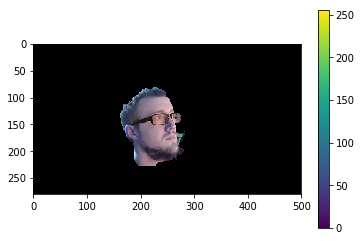

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("fg_ext.jpg")
mask = np.zeros(img.shape[:2], np.uint8)

# specify the background and foreground model
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

# The real important part is the rect we define: rect = (start_x, start_y, width, height)
# This is the rectangle that encases our main object. If you're using my image, that is the rect to use.
# If you use your own, find the proper coordinates for your image.
rect = (161,79,150,150)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0), 0 ,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img)
plt.colorbar()
plt.show()

# All of the code is kept pretty much identical except for the "rect"
# How to choose "rect": 10% X, 10% Y, 90% X, 90% Y -> enough to remove the background

# Corner Detection

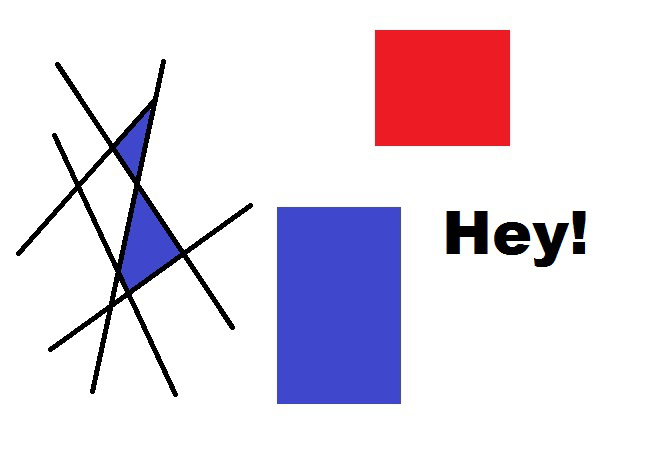

In [3]:
# three-dim recreation, motion tracking, character recognition
from PIL import Image
Image.open("corner.jpg")

In [1]:
import numpy as np
import cv2

img = cv2.imread("corner.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv2.goodFeaturesToTrack(gray, 100,      0.01,    10)
#                                       #finding  quality  minimum distance
corners = np.int0(corners)

for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x,y), 3, 255, -1)
    #         where center r color fill-in
    
cv2.imshow('Corner', img)
cv2.waitKey(0)
cv2.destroyAllWindows()